### Loading Module

In [1]:
pip install prettytable 

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
#importing required modules
import pandas as pd
import numpy as np

#visualisation 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import ListedColormap,LinearSegmentedColormap

from prettytable import PrettyTable
%matplotlib inline

#data transformation
from scipy import stats

#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

#colors
colors = ['#F0D290','#DE834D','#A3423C','#781D42']
colors2 = ['#F0D290','#DE834D','#A3423C','#781D42','#671E31']
colors3 = ['#f0d290','#e9c083','#e2af77','#d99d6d','#d08c64', '#c67b5d',
           '#bc6b56','#b05a51','#a34b4d','#963b49', '#872c45','#781d42']

#xgboost
from xgboost import XGBRegressor

## 1. Order Data

In [4]:
df1 = pd.read_csv(r'C:\Users\Admin\Downloads\Machine Learning\Pizza Sales Dataset\order_details.csv')
df1.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [6]:
df1.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity'], dtype='object')

In [7]:
df1.duplicated().sum()

0

In [8]:
df1.describe()

,order_details_id,order_id,quantity
count,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622
std,14035.529381,6180.119770,0.143077
min,1.000000,1.000000,1.000000
25%,12155.750000,5337.000000,1.000000
50%,24310.500000,10682.500000,1.000000
75%,36465.250000,16100.000000,1.000000
max,48620.000000,21350.000000,4.000000


In [9]:
df2 = pd.read_csv(r'C:\Users\Admin\Downloads\Machine Learning\Pizza Sales Dataset\orders.csv')
df2.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [10]:
df2.describe()

,order_id
count,21350.000000
mean,10675.500000
std,6163.358459
min,1.000000
25%,5338.250000
50%,10675.500000
75%,16012.750000
max,21350.000000


In [11]:
df2.columns

Index(['order_id', 'date', 'time'], dtype='object')

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


In [13]:
df2.duplicated().sum()

0

In [14]:
df2['time'] = pd.to_datetime(df2['time'])

## 2. Pizza Data

In [15]:
df3 = pd.read_csv(r'C:\Users\Admin\Downloads\Machine Learning\Pizza Sales Dataset\pizza_types.csv',encoding='unicode_escape')
df3.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [16]:
df3.describe()

,pizza_type_id,name,category,ingredients
count,32,32,32,32
unique,32,32,4,32
top,bbq_ckn,The Barbecue Chicken Pizza,Supreme,"Barbecued Chicken, Red Peppers, Green Peppers,..."
freq,1,1,9,1


In [17]:
df3.columns

Index(['pizza_type_id', 'name', 'category', 'ingredients'], dtype='object')

In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [19]:
df3.duplicated().sum()

0

In [20]:
df4 = pd.read_csv(r'C:\Users\Admin\Downloads\Machine Learning\Pizza Sales Dataset\pizzas.csv')
df4.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [21]:
df4.describe()

,price
count,96.000000
mean,16.440625
std,4.090266
min,9.750000
25%,12.500000
50%,16.250000
75%,20.250000
max,35.950000


In [22]:
df4.columns

Index(['pizza_id', 'pizza_type_id', 'size', 'price'], dtype='object')

In [23]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


In [24]:
df4.duplicated().sum()

0

## 3. Merging the DataFrames

In [25]:
merge1 = df1.merge(df2,how = 'inner' , on = ['order_id'])
merge1.head()

,order_details_id,order_id,pizza_id,quantity,date,time
0,1,1,hawaiian_m,1,2015-01-01,2024-07-19 11:38:36
1,2,2,classic_dlx_m,1,2015-01-01,2024-07-19 11:57:40
2,3,2,five_cheese_l,1,2015-01-01,2024-07-19 11:57:40
3,4,2,ital_supr_l,1,2015-01-01,2024-07-19 11:57:40
4,5,2,mexicana_m,1,2015-01-01,2024-07-19 11:57:40


In [26]:
merge2 = df3.merge(df4 , how  = 'inner' , on =['pizza_type_id'])
merge2.head()

,pizza_type_id,name,category,ingredients,pizza_id,size,price
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_s,S,12.75
1,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_m,M,16.75
2,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_l,L,20.75
3,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",cali_ckn_s,S,12.75
4,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",cali_ckn_m,M,16.75


## 4. Final DataFrame

In [27]:
df = merge2.merge(merge1, how = 'inner' , on = ['pizza_id'])
df.head()

,pizza_type_id,name,category,ingredients,pizza_id,size,price,order_details_id,order_id,quantity,date,time
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_s,S,12.75,11,6,1,2015-01-01,2024-07-19 12:29:36
1,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_s,S,12.75,239,102,1,2015-01-02,2024-07-19 17:54:04
2,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_s,S,12.75,294,124,1,2015-01-02,2024-07-19 20:12:34
3,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_s,S,12.75,458,194,1,2015-01-03,2024-07-19 21:21:24
4,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_s,S,12.75,489,208,1,2015-01-04,2024-07-19 12:12:05


### Data Overview

In [28]:
df.columns

Index(['pizza_type_id', 'name', 'category', 'ingredients', 'pizza_id', 'size',
       'price', 'order_details_id', 'order_id', 'quantity', 'date', 'time'],
      dtype='object')

In [29]:
df.describe()

,price,order_details_id,order_id,quantity,time
count,48620.000000,48620.000000,48620.000000,48620.000000,48620
mean,16.494132,24310.500000,10701.479761,1.019622,2024-07-19 16:24:51.322151168
min,9.750000,1.000000,1.000000,1.000000,2024-07-19 09:52:21
25%,12.750000,12155.750000,5337.000000,1.000000,2024-07-19 13:24:46
50%,16.500000,24310.500000,10682.500000,1.000000,2024-07-19 16:33:33
75%,20.250000,36465.250000,16100.000000,1.000000,2024-07-19 18:55:19
max,35.950000,48620.000000,21350.000000,4.000000,2024-07-19 23:05:52
std,3.621789,14035.529381,6180.119770,0.143077,NaN


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   pizza_type_id     48620 non-null  object        
 1   name              48620 non-null  object        
 2   category          48620 non-null  object        
 3   ingredients       48620 non-null  object        
 4   pizza_id          48620 non-null  object        
 5   size              48620 non-null  object        
 6   price             48620 non-null  float64       
 7   order_details_id  48620 non-null  int64         
 8   order_id          48620 non-null  int64         
 9   quantity          48620 non-null  int64         
 10  date              48620 non-null  object        
 11  time              48620 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 4.5+ MB


In [31]:
df.columns

Index(['pizza_type_id', 'name', 'category', 'ingredients', 'pizza_id', 'size',
       'price', 'order_details_id', 'order_id', 'quantity', 'date', 'time'],
      dtype='object')

In [32]:
df.describe()

,price,order_details_id,order_id,quantity,time
count,48620.000000,48620.000000,48620.000000,48620.000000,48620
mean,16.494132,24310.500000,10701.479761,1.019622,2024-07-19 16:24:51.322151168
min,9.750000,1.000000,1.000000,1.000000,2024-07-19 09:52:21
25%,12.750000,12155.750000,5337.000000,1.000000,2024-07-19 13:24:46
50%,16.500000,24310.500000,10682.500000,1.000000,2024-07-19 16:33:33
75%,20.250000,36465.250000,16100.000000,1.000000,2024-07-19 18:55:19
max,35.950000,48620.000000,21350.000000,4.000000,2024-07-19 23:05:52
std,3.621789,14035.529381,6180.119770,0.143077,NaN


In [33]:
# make the data columns as datetime datatype
df['date'] = pd.to_datetime(df['date'])

#make columns with just day, month and year 
df.insert(loc=11, column='day', value=df['date'].dt.day)
df.insert(loc=12, column='month', value=df['date'].dt.month)
df.insert(loc=13, column='year', value=df['date'].dt.year)

In [34]:
df.head()

,pizza_type_id,name,category,ingredients,pizza_id,size,price,order_details_id,order_id,quantity,date,day,month,year,time
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_s,S,12.75,11,6,1,2015-01-01,1,1,2015,2024-07-19 12:29:36
1,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_s,S,12.75,239,102,1,2015-01-02,2,1,2015,2024-07-19 17:54:04
2,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_s,S,12.75,294,124,1,2015-01-02,2,1,2015,2024-07-19 20:12:34
3,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_s,S,12.75,458,194,1,2015-01-03,3,1,2015,2024-07-19 21:21:24
4,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_s,S,12.75,489,208,1,2015-01-04,4,1,2015,2024-07-19 12:12:05


In [35]:
print('The shape of the dataset is: ', df.shape)

The shape of the dataset is:  (48620, 15)


In [36]:
raw_train = df.iloc[:34034]
raw_test = df.iloc[34035:].drop(columns='price')  #removing the 'price' column as that is going to be our target variable.

In [37]:
train_original = raw_train.copy()
test_original = raw_test.copy()

<h2 align='center'> Exploratory Data Analysis</h2> 

In [38]:
raw_train.columns

Index(['pizza_type_id', 'name', 'category', 'ingredients', 'pizza_id', 'size',
       'price', 'order_details_id', 'order_id', 'quantity', 'date', 'day',
       'month', 'year', 'time'],
      dtype='object')

In [39]:
#droping columns 'order_id' and 'order_details_id'
raw_train.drop(columns=['order_details_id','order_id'], inplace=True)
raw_test.drop(columns=['order_details_id','order_id'], inplace=True)

In [40]:
raw_train.columns

Index(['pizza_type_id', 'name', 'category', 'ingredients', 'pizza_id', 'size',
       'price', 'quantity', 'date', 'day', 'month', 'year', 'time'],
      dtype='object')

In [41]:
raw_test.columns

Index(['pizza_type_id', 'name', 'category', 'ingredients', 'pizza_id', 'size',
       'quantity', 'date', 'day', 'month', 'year', 'time'],
      dtype='object')

In [42]:
raw_train.duplicated().sum()

0

In this dataset, there are mainly three types of data—categorical data, numerical data and pandas datetime. 
- _**Categorical features**_: pizza_type_id , name ,category , ingredients , pizza_id , size 
- _**Numerical features**_: price , quantity , day , month , year 
- _**Datetime features**_: date , time 

<h3><ins> Univariate Analysis</ins></h3>

<h3>1. Categorical Featrues</h3>

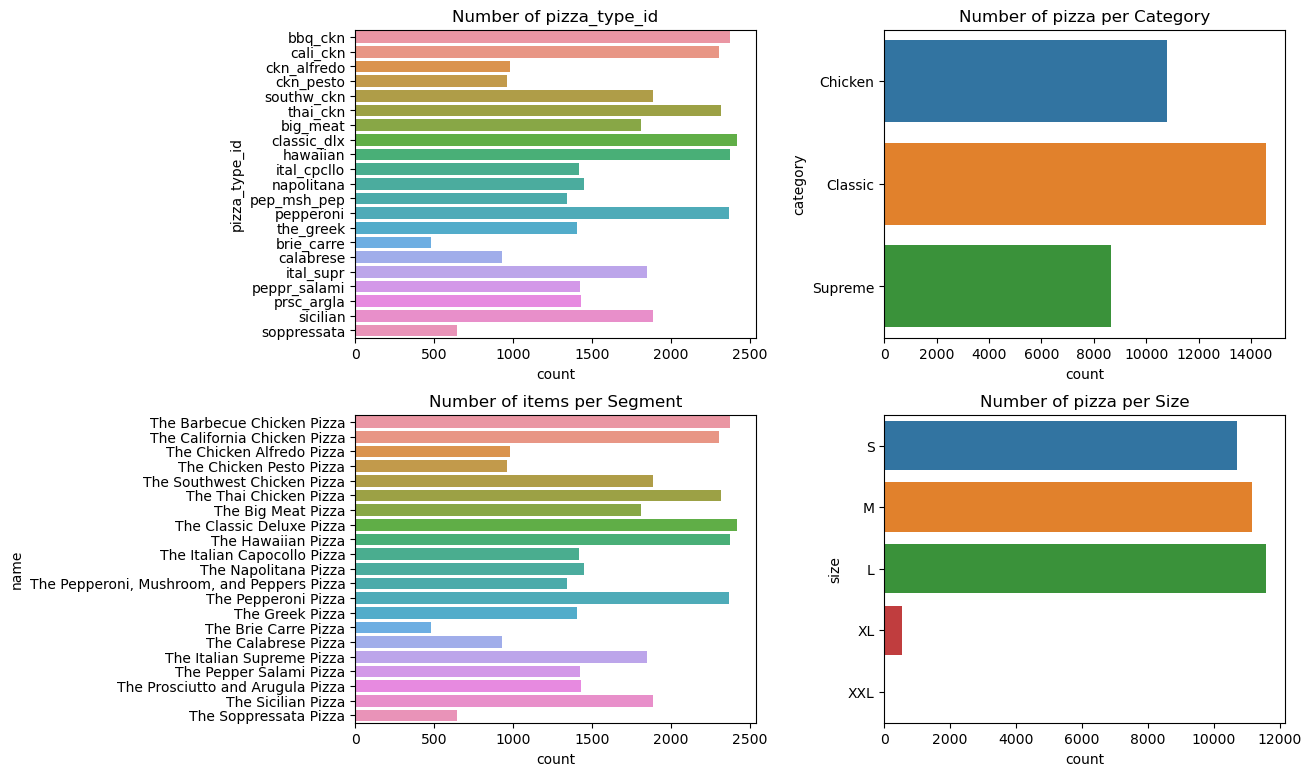

In [43]:
plt.figure(1, figsize=(12, 9))
plt.subplots_adjust(wspace=0.32,hspace=0.25)

plt.subplot(221)
sns.countplot(data=raw_train, y='pizza_type_id',orient='h');
plt.title("Number of pizza_type_id");


plt.subplot(222)
sns.countplot(data=raw_train, y='category',orient='h');
plt.title('Number of pizza per Category')

plt.subplot(223)
sns.countplot(data=raw_train, y='name',orient='h');
plt.title('Number of items per Segment');


plt.subplot(224)
sns.countplot(data=raw_train, y='size',orient='h');
plt.title('Number of pizza per Size');

<h3>2. Numerical Featrues</h3>

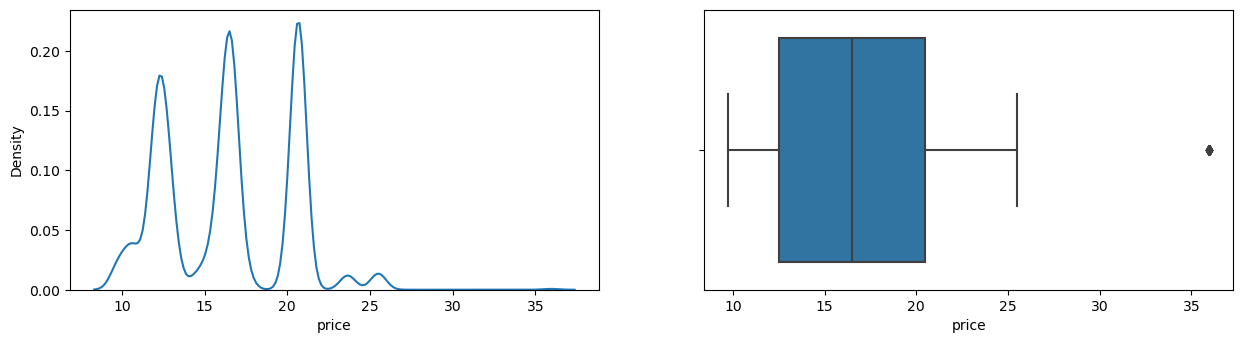

In [44]:
plt.figure(2, figsize=(15, 8))


plt.subplot(221)
sns.kdeplot(data=raw_train, x='price');

plt.subplot(222)
sns.boxplot(data=raw_train, x='price', orient='h');


<h3><ins> Bivariate Analysis</ins></h3>

**Q1. What is the average sales/month for the store?**

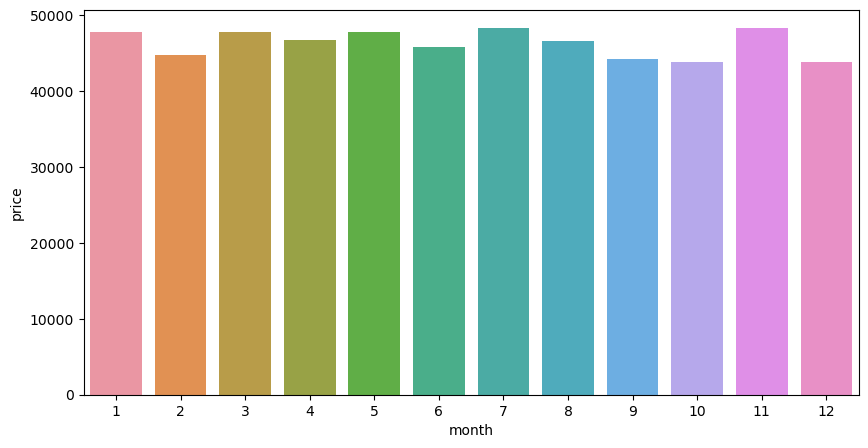

In [45]:
monthly_sales = pd.DataFrame(raw_train.groupby('month')[['quantity','price']].sum()).reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x = 'month', y = 'price',data = monthly_sales)
# plt.xticks(rotation=90)
plt.show()

**Analyzing Pizza Category by Price**

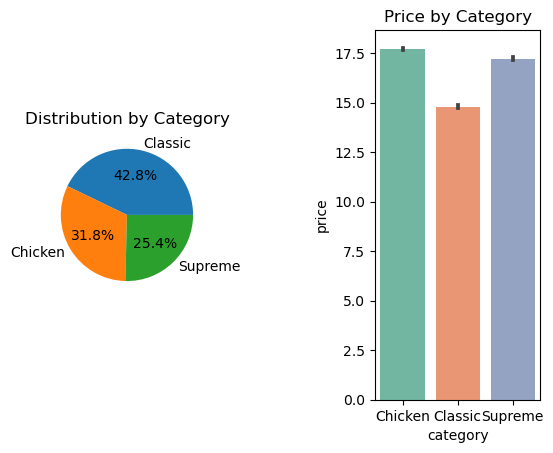

In [46]:
plt.figure(1)

plt.subplot(121)
plt.pie(x=raw_train['category'].value_counts(),labels=raw_train['category'].value_counts().index, autopct="%.1f%%")
plt.title('Distribution by Category')


plt.subplot(122)
sns.barplot(x='category', y='price', data=raw_train,palette='Set2')
plt.title('Price by Category')

plt.subplots_adjust(hspace=1,wspace=1)


**Analyzing Pizza Size by Price**

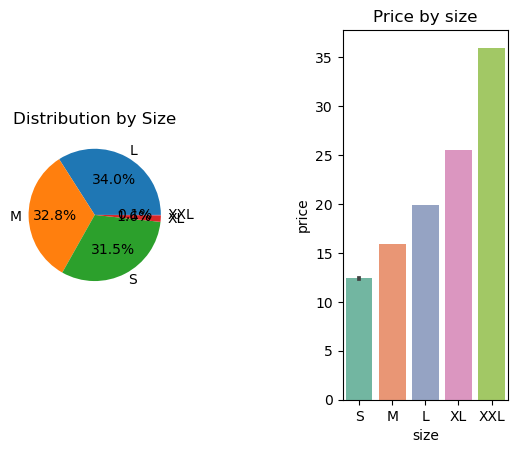

In [47]:
plt.figure(1)

plt.subplot(121)
plt.pie(x=raw_train['size'].value_counts(),labels=raw_train['size'].value_counts().index, autopct="%.1f%%")
plt.title('Distribution by Size')


plt.subplot(122)
sns.barplot(x='size', y='price', data=raw_train,palette='Set2')
plt.title('Price by size')

plt.subplots_adjust(hspace=1,wspace=1)


**Analyzing Pizza Pizza_type_id by Price**

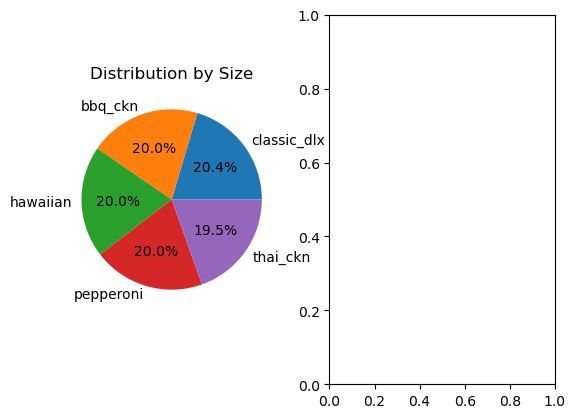

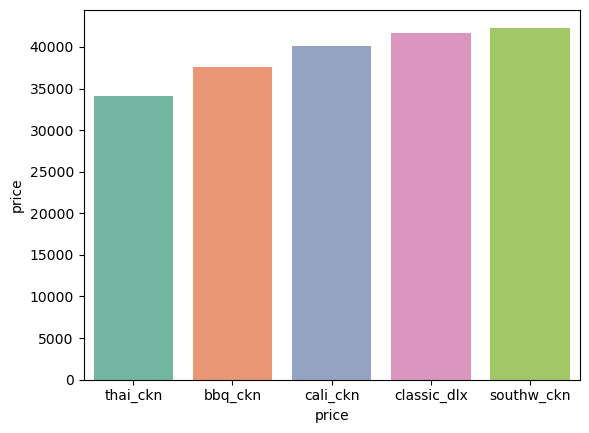

In [48]:
plt.figure(1)

plt.subplot(121)
w=raw_train['pizza_type_id'].value_counts().head(5)
plt.pie(x=w,labels=w.index, autopct="%.1f%%")
plt.title('Distribution by Size')

plt.subplot(122)
ax,fig = plt.subplots()
a = raw_train.groupby('pizza_type_id').agg('price').sum().nlargest(5)
sns.barplot(x=a, y=a, data=a,palette='Set2')
fig.set_xticklabels(list(a.index));

plt.subplots_adjust(hspace=1,wspace=1)


<h3>Time Series Analyis</h3>

In [49]:
categories = raw_train['category'].unique()

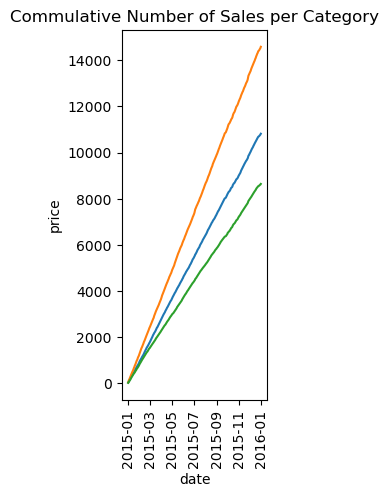

In [50]:
dfbyCatOrderDate = raw_train.groupby(['category','date'])
plt.subplot(131).title.set_text('Commulative Number of Sales per Category')
plt.xticks(rotation=90) 
for cat in categories:
    data = dfbyCatOrderDate['price'].count()[cat]
    data = data.cumsum()
    sns.lineplot(data=data, ax=plt.subplot(131))

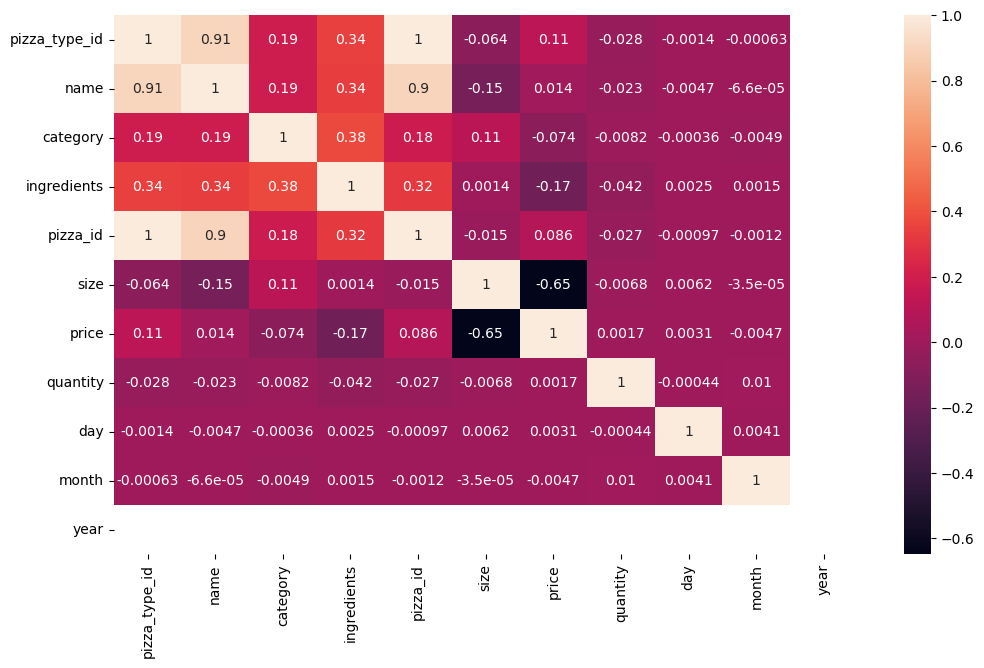

In [86]:
matrix = X.corr() 
f, ax = plt.subplots(figsize=(12, 7)) 
sns.heatmap(matrix,annot=True);

<h2 align='center'>5. Missing value imputation</h2>

In [52]:
raw_train.isnull().sum()

pizza_type_id    0
name             0
category         0
ingredients      0
pizza_id         0
size             0
price            0
quantity         0
date             0
day              0
month            0
year             0
time             0
dtype: int64

Luckily for us there are no null values. But in case they were present, we could consider these methods to fill them: 
- **For numerical variables:** imputation using mean or median.
- **For categorical variables:** imputation using mode.

<h2 align='center'>6. Model building</h2> 

In [53]:
raw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34034 entries, 0 to 34033
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   pizza_type_id  34034 non-null  object        
 1   name           34034 non-null  object        
 2   category       34034 non-null  object        
 3   ingredients    34034 non-null  object        
 4   pizza_id       34034 non-null  object        
 5   size           34034 non-null  object        
 6   price          34034 non-null  float64       
 7   quantity       34034 non-null  int64         
 8   date           34034 non-null  datetime64[ns]
 9   day            34034 non-null  int32         
 10  month          34034 non-null  int32         
 11  year           34034 non-null  int32         
 12  time           34034 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int32(3), int64(1), object(6)
memory usage: 3.0+ MB


In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
raw_train1 = raw_train.drop(['date' , 'time'] , axis = 1)

In [65]:
X = raw_train1.copy()
for col in raw_train.select_dtypes("O").columns:
    lbd = LabelEncoder()
    X[col] = lbd.fit_transform(X[col].values)

In [66]:
X.shape

(34034, 11)

In [67]:
y = raw_train['price']

In [68]:
y.head()

0    12.75
1    12.75
2    12.75
3    12.75
4    12.75
Name: price, dtype: float64

In [84]:
#helper functions

models_results_rmse = {}
models_results_r2 = {}

def evaluate(y_t, y_p, title):
    table = PrettyTable()
    table.field_names = ['Metric', 'Value']
    
    rmse = mean_squared_error(y_t, y_p, squared=False).round(4)
    r2 = r2_score(y_t, y_p).round(4)
    
    table.add_row(['RMSE', rmse])
    table.add_row(['R2 Score', r2])
    
    models_results_rmse[title] = rmse
    models_results_r2[title] = r2
    
    print(table)
    

def plot_forecasted_income(y_pred, y_train, y_true=[], period=5, title=''):
    
    # plot
    plt.figure(figsize=(20, 8))
    plt.plot(y_train.to_list(), color=colors[0])
    plt.plot([None for i in y_train] + [x for x in y_pred], color=colors[2])
    
    # set legend
    if len(y_true) > 0:
        plt.plot([None for i in y_train] + [x for x in y_true], color=colors[1])
        plt.legend(['Acual INCOME', 'Acual INCOME', f'2017 Forecasted SALES \
(RMSE = {mean_squared_error(y_true, y_pred, squared=False).round(1)}, R2 = {r2_score(y_true, y_pred).round(3)})'])
    else:
        plt.legend([' Actual PRICE', 'Forecasted PRICE'])
    
    # set parameters
    plt.xticks(range(0, len(y_train) + len(y_pred), period), rotation=75)
    plt.xlabel('DAYS')
    plt.ylabel('Price')
    plt.title(title)
    plt.show()

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=1)

In [71]:
X_train.columns

Index(['pizza_type_id', 'name', 'category', 'ingredients', 'pizza_id', 'size',
       'price', 'quantity', 'day', 'month', 'year'],
      dtype='object')

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

modelLR = LinearRegression() 
modelLR.fit(X_train, y_train)
y_pred = modelLR.predict(X_test)

evaluate(y_test, y_pred, title='Linear Regression')

+----------+-------+
|  Metric  | Value |
+----------+-------+
|   RMSE   |  0.0  |
| R2 Score |  1.0  |
+----------+-------+


In [73]:
from sklearn.tree import DecisionTreeRegressor

modelDTR = DecisionTreeRegressor(max_depth=3)
modelDTR.fit(X_train, y_train)
y_pred = modelDTR.predict(X_test)

evaluate(y_test, y_pred, title='Decision Tree Regression')

+----------+--------+
|  Metric  | Value  |
+----------+--------+
|   RMSE   | 0.3448 |
| R2 Score | 0.9916 |
+----------+--------+


In [79]:
from sklearn.ensemble import RandomForestRegressor

modelRFR = RandomForestRegressor(max_depth=3)
modelRFR.fit(X_train, y_train)
y_pred = modelRFR.predict(X_test)

evaluate(y_test, y_pred, title='Random Forest Regression')

+----------+--------+
|  Metric  | Value  |
+----------+--------+
|   RMSE   | 0.3415 |
| R2 Score | 0.9917 |
+----------+--------+


In [75]:
from sklearn.svm import SVR

modelSVR = SVR()
modelSVR.fit(X_train, y_train)
y_pred = modelSVR.predict(X_test)

evaluate(y_test, y_pred, title='Support Vector Regression')

+----------+--------+
|  Metric  | Value  |
+----------+--------+
|   RMSE   | 3.5669 |
| R2 Score | 0.0975 |
+----------+--------+


In [76]:
modelXGB = XGBRegressor()
modelXGB.fit(X_train, y_train)
y_pred = modelXGB.predict(X_test)

evaluate(y_test, y_pred, title='XGBoost')

+----------+-------+
|  Metric  | Value |
+----------+-------+
|   RMSE   |  0.0  |
| R2 Score |  1.0  |
+----------+-------+


<h2 align='center'>7. Conclusion</h2> 

### 7.1 Model evaluation - R2 Score

<Figure size 2000x800 with 0 Axes>

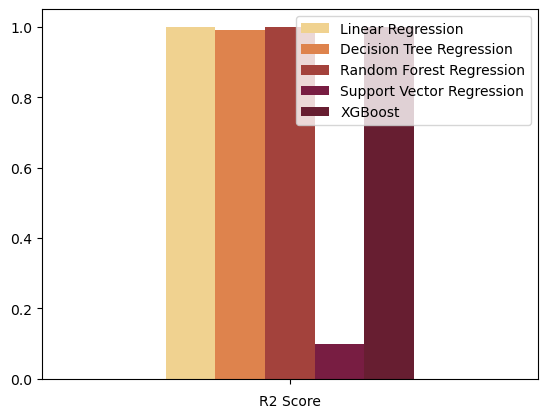

In [77]:
plt.figure(figsize=(20, 8))
pd.DataFrame(models_results_r2, index=['']).plot.bar(color=colors2);
plt.xlabel('R2 Score');

### 7.2  Model evaluation - Root Mean Square Error

<Figure size 2000x800 with 0 Axes>

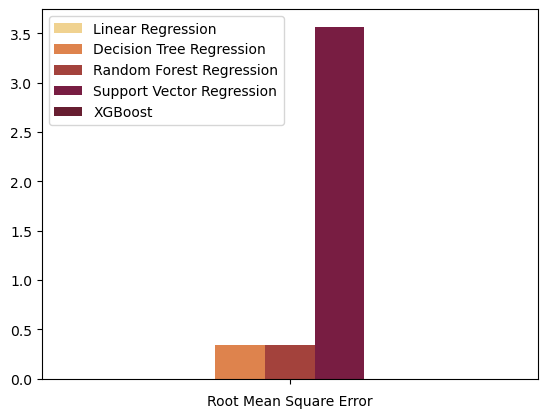

In [80]:
plt.figure(figsize=(20, 8))
pd.DataFrame(models_results_rmse, index=['']).plot.bar(color=colors2);
plt.xlabel('Root Mean Square Error');

### 9.3 Final Forecasting using best performed model (Random Forest Regression)

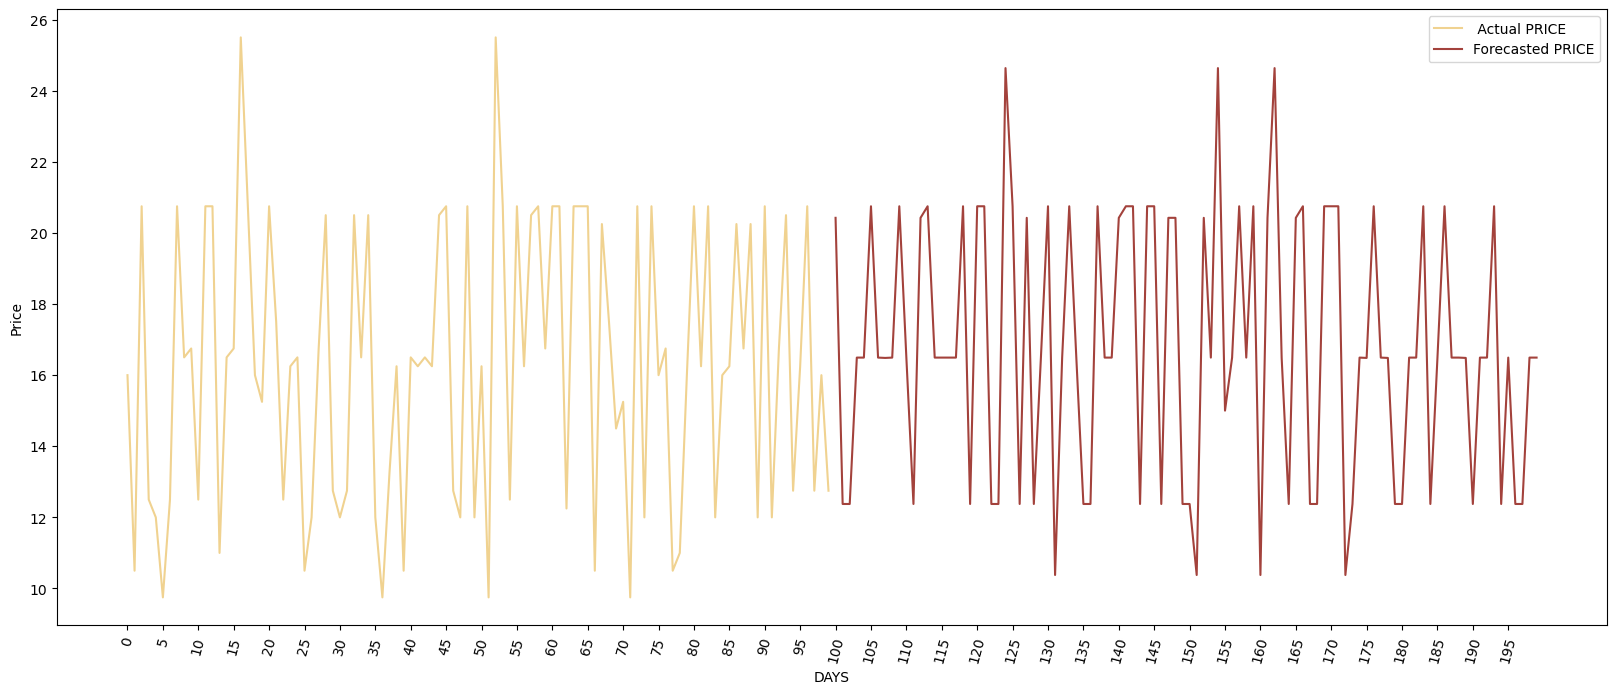

In [85]:
modeRFR = RandomForestRegressor(max_depth= 3)
modelRFR.fit(X_train, y_train)
y_pred = modelRFR.predict(X_test)
plot_forecasted_income(y_pred[:100] , y_train[:100])